In [1]:
# Association Rule Learning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori


In [4]:
# Read data set
df = pd.read_csv('Market_Basket_Optimisation.csv', header=None)

In [5]:
# Data Analysis
print(df.shape)


(7501, 20)


In [7]:
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


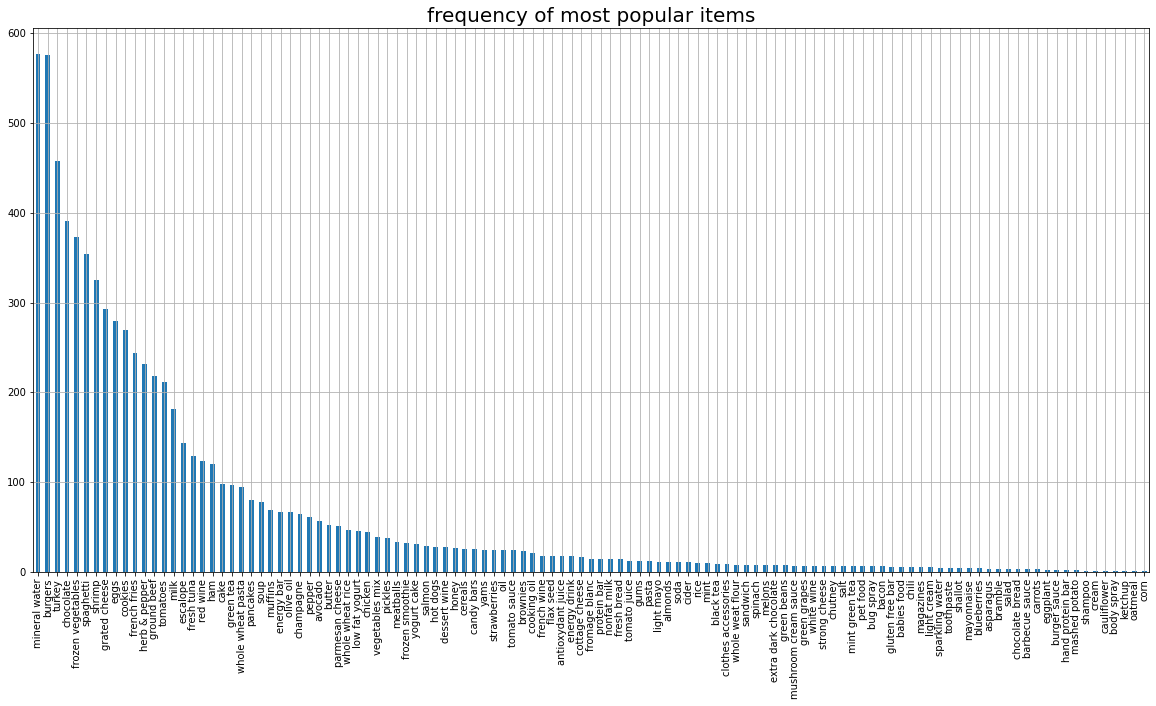

In [8]:
plt.figure(figsize=(20,10))
df[0].value_counts().plot.bar()
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()


In [11]:
# Generate the list of transactions from the dataset

# The Apriori library we use requires our dataset to be in the form of a listof lists, 
# where the whole dataset is a big list and each transaction in the dataset is an inner list within the outer big list.
#First we transforn dataframe into a list of transactions 7501


products= []
for i in range(0,7501):
    products.append([str(df.values[i,j]) for j in range(20)])

In [12]:
print(products[1])


['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan']


In [13]:
# Train Apriori algorithm on the dataset

In [14]:
from apyori import apriori

In [15]:
model= apriori(products, min_support= 0.003, min_confidence= 0.2, min_lift=3,min_length = 2 , max_length = 2 )

In [17]:
results = list(model)
for i in results:
    print('\n')
    print(i)
    print('**********')




RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])
**********


RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)])
**********


RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)])
**********


RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=

In [18]:
pd.DataFrame(results)


,items,support,ordered_statistics
0,"(light cream, chicken)",0.004533,"[((light cream), (chicken), 0.2905982905982905..."
1,"(escalope, mushroom cream sauce)",0.005733,"[((mushroom cream sauce), (escalope), 0.300699..."
2,"(escalope, pasta)",0.005866,"[((pasta), (escalope), 0.3728813559322034, 4.7..."
3,"(honey, fromage blanc)",0.003333,"[((fromage blanc), (honey), 0.2450980392156863..."
4,"(herb & pepper, ground beef)",0.015998,"[((herb & pepper), (ground beef), 0.3234501347..."
5,"(ground beef, tomato sauce)",0.005333,"[((tomato sauce), (ground beef), 0.37735849056..."
6,"(olive oil, light cream)",0.003200,"[((light cream), (olive oil), 0.20512820512820..."
7,"(olive oil, whole wheat pasta)",0.007999,"[((whole wheat pasta), (olive oil), 0.27149321..."
8,"(pasta, shrimp)",0.005066,"[((pasta), (shrimp), 0.3220338983050847, 4.506..."


In [19]:
for item in results:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0]
    items = [ x for x in pair ]
    print("Rule: " + items[0] + " -> " + items [1] )
    #second index of the inner list
    print("Support: " + str(item[1]))
    #third index of the list located at 0th
    #of the third index of the inner list
    print("Confidence: " + str( item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("===================================\n")
    
    

Rule: light cream -> chicken
Support: 0.004532728969470737
Confidence: 0.29059829059829057
Lift: 4.84395061728395

Rule: escalope -> mushroom cream sauce
Support: 0.005732568990801226
Confidence: 0.3006993006993007
Lift: 3.790832696715049

Rule: escalope -> pasta
Support: 0.005865884548726837
Confidence: 0.3728813559322034
Lift: 4.700811850163794

Rule: honey -> fromage blanc
Support: 0.003332888948140248
Confidence: 0.2450980392156863
Lift: 5.164270764485569

Rule: herb & pepper -> ground beef
Support: 0.015997866951073192
Confidence: 0.3234501347708895
Lift: 3.2919938411349285

Rule: ground beef -> tomato sauce
Support: 0.005332622317024397
Confidence: 0.3773584905660377
Lift: 3.840659481324083

Rule: olive oil -> light cream
Support: 0.003199573390214638
Confidence: 0.20512820512820515
Lift: 3.1147098515519573

Rule: olive oil -> whole wheat pasta
Support: 0.007998933475536596
Confidence: 0.2714932126696833
Lift: 4.122410097642296

Rule: pasta -> shrimp
Support: 0.005065991201173177